In [1]:
"""
    Fashion mnist project 
    
    
    Table of Contents:

        1. Importing data
        2. Preprocessing data
        3. Build the model
            3-1. Set up the layers
            3-2. Compile the model
        4. Train the model
            4-1. Feed the model
            4-2. Evaluate the accuracy
            4-3. Make predictions
            4-4. Verify predictions


    Reference:
        https://www.tensorflow.org/tutorials/keras/classification
"""
print()

In [3]:
import numpy      as np
import tensorflow as tf
import matplotlib 


print(f"[+] Numpy version: {np.__version__}")
print(f"[+] Tensorflow version: {tf.__version__}")
print(f"[+] Matplotlib version: {matplotlib.__version__}")

[+] Numpy version: 1.19.4
[+] Tensorflow version: 2.4.0
[+] Matplotlib version: 3.2.1


In [4]:
"""                                    
        1. Importing data
        
        Description: Importing/Loading data from mnist database
"""

from tensorflow.keras.datasets import fashion_mnist

[train_images, train_labels], [test_images, test_labels] = fashion_mnist.load_data()



##### EXAMPLE-1: FASHION MNIST DATA #####
##### EXAMPLE-2: VISUALIZE TRAIN IMAGES #####

In [6]:
"""                                
        2. Preprocessing data 
        
        Description: Mapping pixel values from 0-255 to 0-1 which means normalizing data.
"""

train_images = train_images / np.float32(255)
test_images  = test_images  / np.float32(255)
 

##### EXAMPLE-3: VISUALIZE PREPROCESSED TRAIN IMAGES #####

In [7]:
"""                                    
        3. Build the model
            3-1. Set up the layers

        
        Description:
            - Flatten layer: Reformat 2D matrix (28*28) image to 1D matrix (784*1)
                (https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png)
                
            - Dense layer: Fully-connected layer
"""    

from tensorflow.keras        import Sequential
from tensorflow.keras.layers import Dense, Flatten


model = Sequential( [
    Flatten( input_shape=(28, 28) ),
    Dense(128, activation="relu"),
    Dense(10)
] )


In [8]:
"""                                    
        3. Build the model
            3-2. Compile the model

        Description:
            - Optimizer: How model update itself.
            - Loss: Compute the quantity that a model should seek to minimize during training. It 
                    used when two or more label classes was defined.
            - Metric: 
            

"""

from tensorflow.keras.losses import SparseCategoricalCrossentropy as SCC


model.compile(
    optimizer="adam",
    loss=SCC(from_logits=True),
    metrics=["accuracy"]
)


In [9]:
"""                                    
        4. Train the model
            4-1 Feed the model
    
        Description: Feed the model with train images 
"""

model.fit(
    train_images,
    train_labels,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4983 - accuracy: 0.5477
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6675 - accuracy: 0.7596
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5820 - accuracy: 0.7894
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5291 - accuracy: 0.8118
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5007 - accuracy: 0.8220
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4787 - accuracy: 0.8306
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4678 - accuracy: 0.8356
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4539 - accuracy: 0.8394
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4425 - accuracy: 0.8430
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.432

In [10]:
"""                                    
        4. Train the model 
            4-2 Evaluate the accuracy

        Description: compare how the model performs on the test dataset
            - Overfitting concept
"""

loss, accuracy = model.evaluate(test_images, test_labels, verbose=2)
print( f"Loss: {loss}\nAccuracy: {accuracy}" )


313/313 - 0s - loss: 0.4708 - accuracy: 0.8277
Loss: 0.47079214453697205
Accuracy: 0.8277000188827515


In [21]:
"""                                    
        4. Train the model 
            4-3 Make predictions
        
        Description: Append softmax as last hidden layer and make prediction about all test images.
            - Softmax: Convert logits to probabilities for easier interpretation.
"""

from tensorflow.keras.layers import Softmax


probability_model = Sequential( [
    model,
    Softmax()
] )

prediction = probability_model.predict( test_images )



##### EXAMPLE-4: Check prediction #####
# print( f"[+] prediction shape: {prediction.shape}\n" )

def predict_accuracy(num):
    print( prediction[num] )
    print( f"[+] Index[{np.argmax( prediction[num] )}]: {np.max( prediction[num] )}" )

predict_accuracy(5)
#######################################

[1.2286300e-03 9.9462825e-01 3.0059754e-04 9.5208647e-04 2.8132123e-03
 8.3058517e-12 7.6120406e-05 5.2402416e-09 1.0675617e-06 2.5030547e-10]
[+] Index[1]: 0.9946282505989075


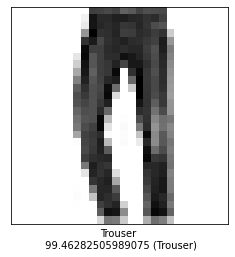

In [22]:
"""                                    
        4. Train the model
            4-4 Verify predictions

        Description: Plot test images if prediction was corrected.
"""

import matplotlib.pyplot as plt


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


def plot(i):
    
    ## Expected data
    image, label = test_images[i], test_labels[i]
    
    ## Predicted data
    predicted_data  = prediction[i]
    predicted_label = np.argmax( predicted_data )
    predicted_image = test_images[i]
    
    if not predicted_label == label: return

    ## Plotting predicted image
    plt.figure()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow( predicted_image, cmap=plt.cm.binary )
#     plt.imshow( predicted_image )
#     plt.colorbar()
    label = f"{ class_names[predicted_label] } \n {100*np.max(predicted_data)} ({ class_names[label] })"
    plt.xlabel(label.center(20, ' '))
    plt.show()


plot(5)